<a href="https://colab.research.google.com/github/arya-sharma-codes/MedicalAppointmentNoShows/blob/main/Medical_Appointment_Now_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
pwd

'/content'

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d joniarroba/noshowappointments

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 37.9MB/s]


In [ ]:
!ls

kaggle.json  KaggleV2-May-2016.csv  noshowappointments.zip


In [ ]:

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  noshowappointments.zip
replace KaggleV2-May-2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Data Wrangling


In [ ]:
# import packages
import numpy as np #For scientific computing
import pandas as pd #For data manipulation 
import matplotlib.pyplot as plt #For data visualization 
import seaborn as sns #For more advamced data visualization 

In [ ]:
# import the data
#df = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")
data = pd.read_csv('/content/gdrive/My Drive/Kaggle/KaggleV2-May-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
data.shape

(110527, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# Converting to Datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
#Removing the TimeZones 
data['ScheduledDay'] = data['ScheduledDay'].dt.tz_localize(None)
data['AppointmentDay'] = data['AppointmentDay'].dt.tz_localize(None)

In [ ]:
#Converting to boolean
for col in ["Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap"]:
    data[col] = data[col].astype(np.bool)

In [ ]:
#The original shape of the dataset
data.shape

(110527, 14)

In [ ]:
#dropping the duplicates in the data and checking the shape thereafter
data.drop_duplicates()
data.shape

(110527, 14)

In [ ]:
#checking column names
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
 #correcting misspellings
 data = data.rename(columns={"Hipertension": "Hypertension", "Handcap":"Handicap"})
 data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
#checing for the null values 
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
#Checking the minimum and maximum values of different variables in the data 
pd.DataFrame({"min":data.min(), "max":data.max()})

,min,max
PatientId,39217.8,9.99982e+14
AppointmentID,5030230,5790484
Gender,F,M
ScheduledDay,2015-11-10 07:13:56,2016-06-08 20:07:23
AppointmentDay,2016-04-29 00:00:00,2016-06-08 00:00:00
Age,-1,115
Neighbourhood,AEROPORTO,VILA RUBIM
Scholarship,False,True
Hypertension,False,True
Diabetes,False,True


In [ ]:
# Checking  Age again,there are certian anamolies in the data since the minimum age is -1 whixh is not possible. Also 115 was not found on further investigation.
print(sorted(data['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [ ]:
#looking for the row with age -1
data[data['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,False,0,No


In [ ]:
#looking for recordswith age 115
data[data["Age"] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,True,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,True,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,False,False,False,False,True,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,False,False,False,False,True,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,False,True,False,False,False,1,No


In [ ]:
# Removing these rows froom data 
data= data[(data['Age'] > 0) & (data['Age'] < 115)]

In [ ]:
#Extracting the appointement month, appointment day of weel and appointemnet hour from the appointement day column
data['AppointmentMonth'] = data['AppointmentDay'].dt.month
data['AppointmentDayofWeek'] = data['AppointmentDay'].dt.day_name()
data['AppointmentHour'] = data['AppointmentDay'].dt.hour

In [ ]:
#Extracting the scheduled month, scheduled day of the week and scheduled hour from the scheduled day column
data['ScheduledMonth'] = data['ScheduledDay'].dt.month
data['ScheduledDayofWeek'] = data['ScheduledDay'].dt.day_name()
data['ScheduledHour'] = data['ScheduledDay'].dt.hour

Exploratory data analysis


Analyzing the Gender column and gatherinf insights if it has some affect 


In [ ]:
data['Gender'].value_counts()

F    70113
M    36869
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Male vs Female attendace')

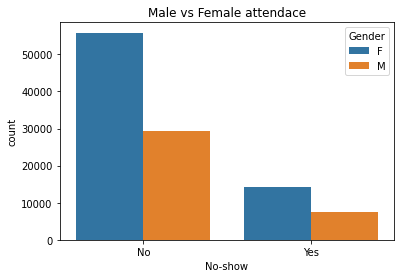

In [ ]:
sns.countplot(x=data['No-show'], hue=data['Gender'])
plt.title('Male vs Female attendace')

From above we can see that more females have entries in the dataset. Also, from the plotit is evident that females have more shows probably because there more entries for females in the data.

Analyzing Age 

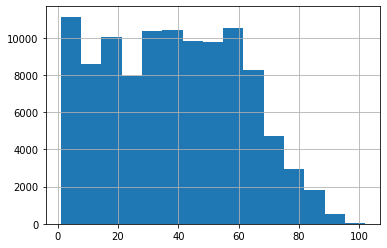

In [ ]:
#Age wise EDA
data['Age'].hist(bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


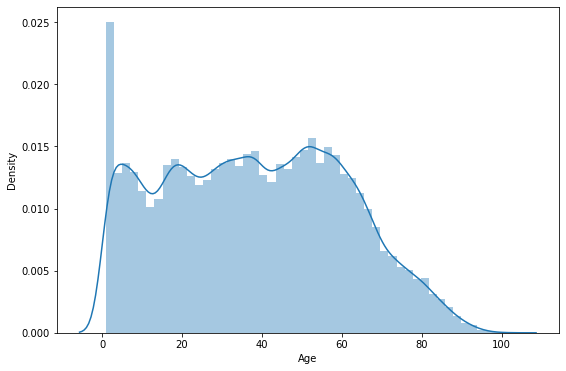

In [ ]:
plt.figure(figsize=(9,6))
sns.distplot(data['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


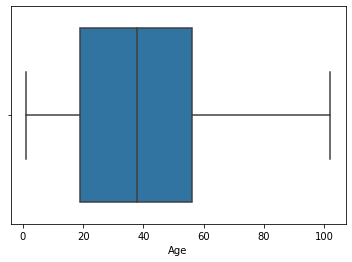

In [ ]:
sns.boxplot(data['Age'])
plt.show()

In [ ]:
#Making intervals for ages for better understanding 
data["Age_bins"] = pd.qcut(data.Age, 5, labels = ["0 - 12", "13 - 29", "30 - 44", "45 - 58", "59 - 115"])
data.Age_bins.unique()

['59 - 115', '45 - 58', '0 - 12', '13 - 29', '30 - 44']
Categories (5, object): ['0 - 12' < '13 - 29' < '30 - 44' < '45 - 58' < '59 - 115']

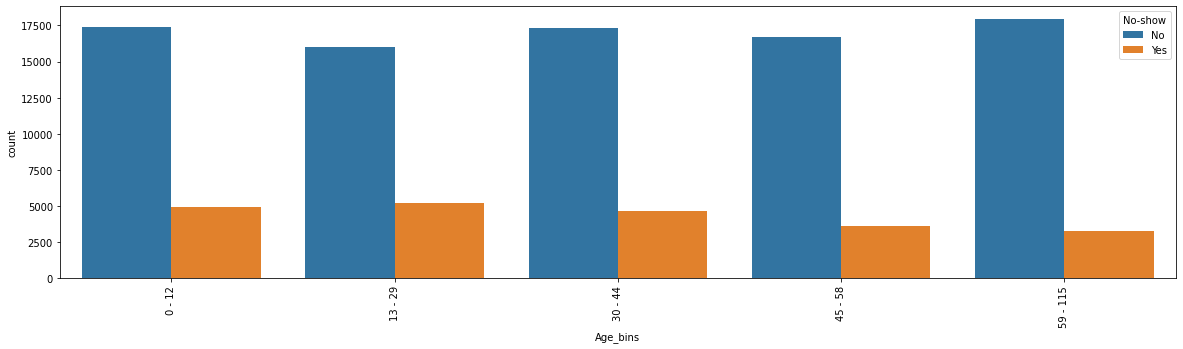

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['Age_bins'], hue=data['No-show'])
plt.xticks(rotation=90);

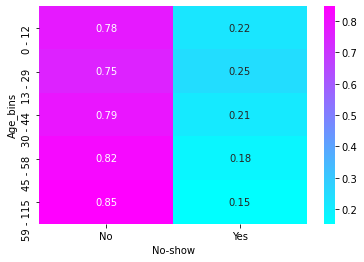

In [ ]:
sns.heatmap(pd.crosstab(data['Age_bins'], data['No-show'],normalize='index'),cmap="cool", annot=True)
plt.show()

From above it is evident that the mean age is 38yrs. Also, people in the age group 30-44yrs turn up for the appointments the most.

Analyzing the Neighbourhood column

In [ ]:
print("Number of Unique Neighbourhoods"+ str(data['Neighbourhood'].nunique()))
print("The top 10 neighbourhoods with highest number of entries")
print(data["Neighbourhood"].value_counts().head(10))
print("The 10 neighborhoods with lowest number of entries")
print(data["Neighbourhood"].value_counts().tail(10))

Number of Unique Neighbourhoods81
The top 10 neighbourhoods with highest number of entries
JARDIM CAMBURI       7586
MARIA ORTIZ          5563
RESISTÊNCIA          4235
JARDIM DA PENHA      3851
ITARARÉ              3412
CENTRO               3282
SANTA MARTHA         3041
TABUAZEIRO           3019
JESUS DE NAZARETH    2719
BONFIM               2700
Name: Neighbourhood, dtype: int64
The 10 neighborhoods with lowest number of entries
UNIVERSITÁRIO                  151
SEGURANÇA DO LAR               140
NAZARETH                       132
MORADA DE CAMBURI               94
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: Neighbourhood, dtype: int64


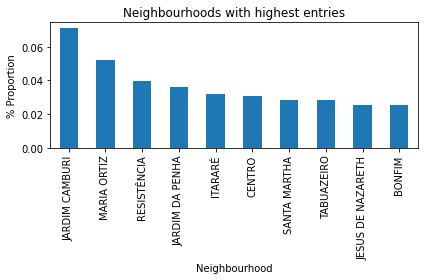

In [ ]:
#anlayzing as per the entries in the data first and then overall
#plt.figure(figsize=(10,6))
#plt.subplot(1,2,1)
Top_10_Neighbhourhoods = data['Neighbourhood'].value_counts(normalize = True).head(10)
Top_10_Neighbhourhoods.plot(kind = 'bar')
plt.title('Neighbourhoods with highest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('% Proportion')
plt.tight_layout()
plt.show()

Text(0, 0.5, '% Proportion')

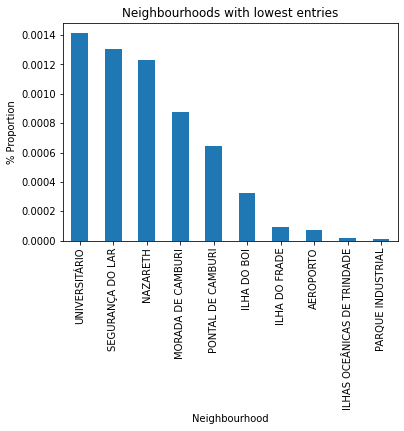

In [ ]:
bottom_10_neighbhourhoods = data['Neighbourhood'].value_counts(normalize = True).tail(10)
bottom_10_neighbhourhoods.plot(kind = 'bar')
plt.title('Neighbourhoods with lowest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('% Proportion')

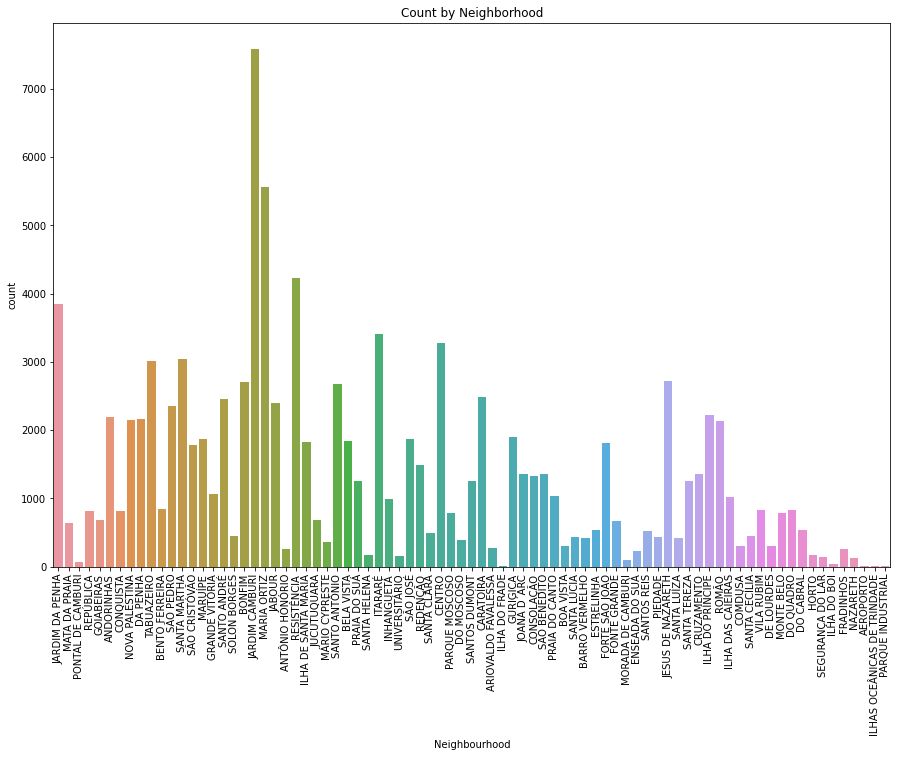

In [ ]:
#Neighborhood Analysis
plt.figure(figsize=(15,10))
sns.countplot(x=data.Neighbourhood);
plt.title('Count by Neighborhood')
plt.xticks(rotation=90);

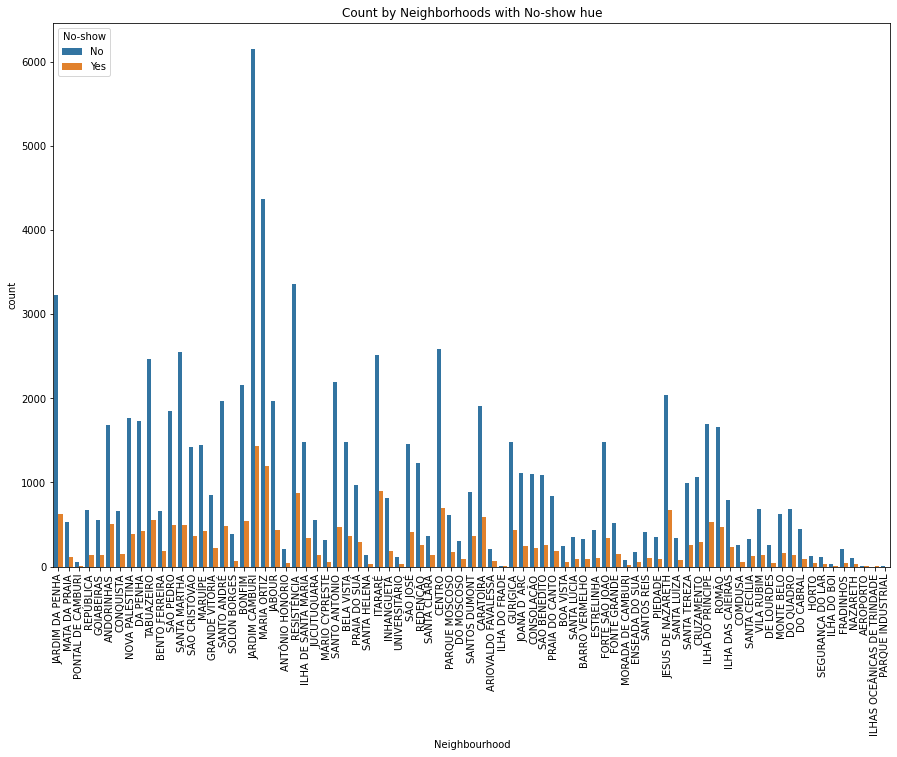

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x=data['Neighbourhood'], hue=data['No-show']);
plt.xticks(rotation=90);
plt.title('Count by Neighborhoods with No-show hue');

From above it is evident that the neighborhood JARDIM DA PEHNHA records the highest shows. This can indicate that there might be alot of people suffering from some disease in that neighborhood.

Some **more** visualzations.
Different Medical Conditions with respect to different age groups.

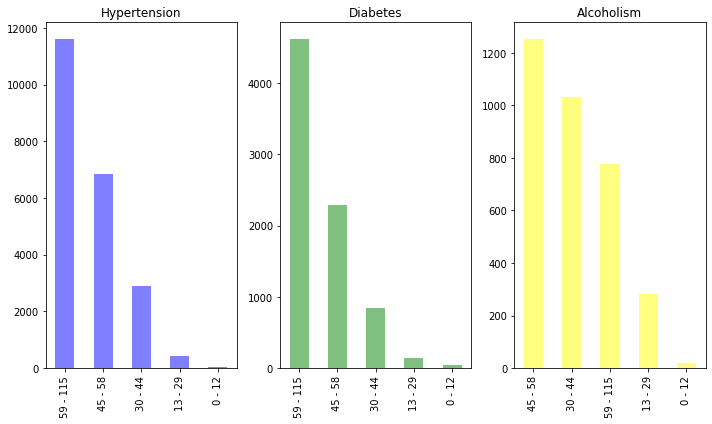

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(131)
df_Hipertension = data[data["Hypertension"] == 1]
df_Hipertension['Age_bins'].value_counts().plot(kind = 'bar',alpha=0.5,color='blue')
plt.title('Hypertension')

plt.subplot(132)
df_Diabetes = data[data['Diabetes'] == 1]
df_Diabetes['Age_bins'].value_counts().plot(kind = 'bar',alpha=0.5,color='green')
plt.title('Diabetes')

plt.subplot(133)
df_Alcoholism = data[data['Alcoholism'] == 1]
df_Alcoholism['Age_bins'].value_counts().plot(kind = 'bar',alpha=0.5,color='yellow')
plt.title('Alcoholism')

plt.tight_layout()
plt.show()


Visualizing some other factors with respect to No-show.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

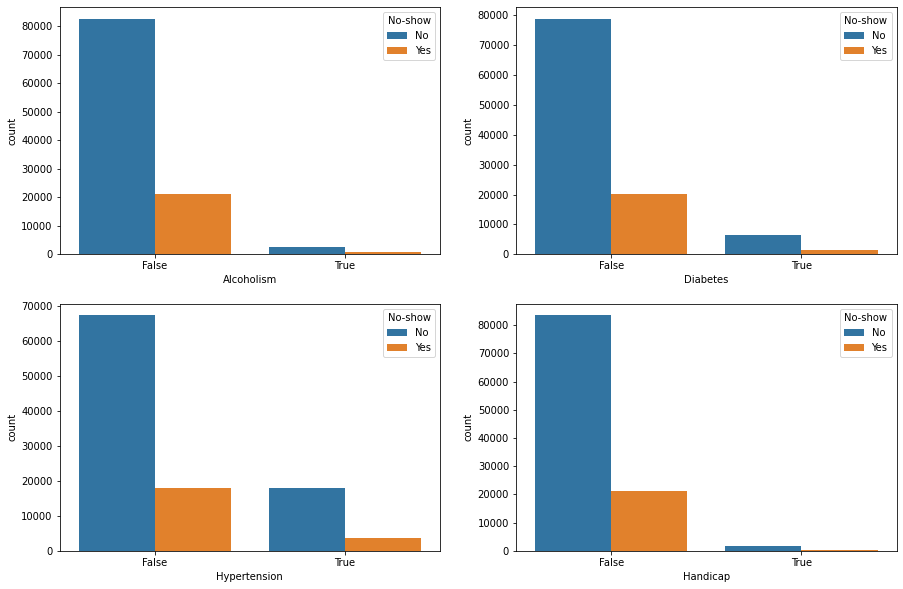

In [ ]:
#plotting other important variabls with No-show
plt.figure(figsize=(15,10));
plt.subplot(2,2,1)
sns.countplot(data['Alcoholism'],hue=data['No-show'])
plt.subplot(2,2,2)
sns.countplot(data['Diabetes'],hue=data['No-show'])
plt.subplot(2,2,3)
sns.countplot(data["Hypertension"],hue=data['No-show'])
plt.subplot(2,2,4)
sns.countplot(data['Handicap'],hue=data['No-show'])

Inference form above is that most people who show up are not suffering from the respective variables.An interseting observation that can be made is that people having no hypertension show up by the same number as the people with hypertension.

Analysis on the Appointment Day column and its derivatives and Scheduled Day and its derivatives.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


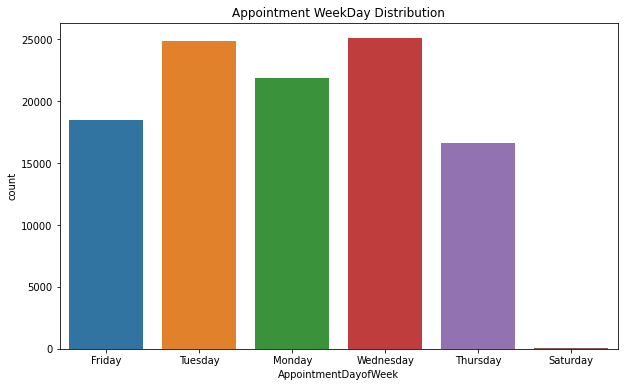

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['AppointmentDayofWeek'])
plt.title('Appointment WeekDay Distribution')
plt.show()

In [ ]:
print(data['AppointmentDayofWeek'].value_counts(normalize = True))

Wednesday    0.234525
Tuesday      0.232104
Monday       0.204717
Friday       0.172590
Thursday     0.155699
Saturday     0.000365
Name: AppointmentDayofWeek, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


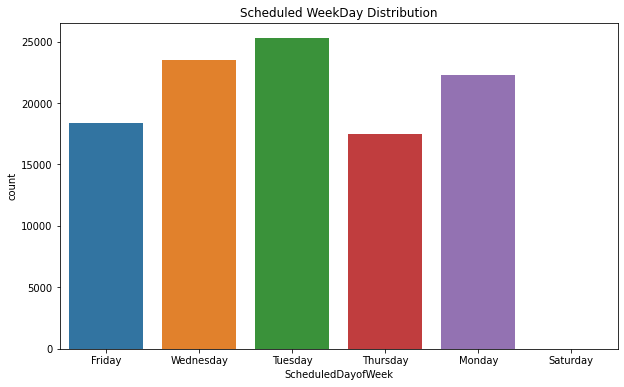

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['ScheduledDayofWeek'])
plt.title('Scheduled WeekDay Distribution')
plt.show()

In [ ]:
print(data['ScheduledDayofWeek'].value_counts(normalize = True))

Tuesday      0.236301
Wednesday    0.220074
Monday       0.207923
Friday       0.171739
Thursday     0.163757
Saturday     0.000206
Name: ScheduledDayofWeek, dtype: float64


In [ ]:
print(max(data['AppointmentDay']) - min(data['AppointmentDay']))

data['ScheduledDate']= data['ScheduledDay'].dt.date.astype('datetime64[ns]')
print(max(data['ScheduledDate']) - min(data['ScheduledDate']))



40 days 00:00:00
211 days 00:00:00


Appointment interval is 40 days and the scheduling interval is 211 days.

In [ ]:
data= data.drop(['AppointmentDay','ScheduledDay'],axis=1)

In [ ]:
data['NoShow'] = pd.get_dummies(data['No-show'])['Yes']
no_show = len(data[data['NoShow'] == 1])
print(f'No-shows: {no_show}')

total = len(data)
print(f'Percentage no-show: {(no_show/total) * 100}')

No-shows: 21677
Percentage no-show: 20.262287113720063


CONCLUSIONS:
1. Age is a big determinant. Young people are seen to turn up more for the appointments.
Also, the mean age in the data is seen as 38 yrs.
2. According to the analysis, females turn up more then males. Bt the fact that there more entries for females cannot be ignored.
3. Some neighborhoods show up more then others, which might indicate either there is spread of some disease in that region or peopleare in general are more aware.It would have been more helpfulif the data indicated some sort of additional information regarding the neighborhoods. As in the distance to the doctor's clinic or if there is some transportation avaliable or not.
4.Medical conditions show that not many people are affected by these conditions but the people who, most of them turn up for the appointment.